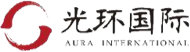

### 为什么学习pandas
- numpy已经可以帮助我们进行数据的处理了，那么学习pandas的目的是什么呢？
    - numpy能够帮助我们处理的是数值型的数据，当然在数据分析中除了数值型的数据还有好多其他类型的数据（字符串，时间序列），那么pandas就可以帮我们很好的处理除了数值型的其他数据！

### 什么是pandas？
- Pandas 库是一个免费、开源的第三方 Python 库，是 Python 数据分析和机器学习必不可少的工具之一，它为 Python 数据分析提供了高性能，且易于使用的数据结构，即 Series 和 DataFrame。Pandas 自诞生后被应用于众多的领域，比如金融、统计学、社会科学、建筑工程等。

- Pandas 库基于 Python NumPy 库开发而来，因此，它可以与 Python 的科学计算库配合使用。Pandas 提供了两种数据结构，分别是 Series（一维数组结构）与 DataFrame（二维数组结构），这两种数据结构极大地增强的了 Pandas 的数据分析能力。

### Series
- Series是一种类似与一维数组的对象，由下面两个部分组成：
    - values：一组数据（ndarray类型）
    - index：相关的数据索引标签

In [1]:
import numpy as np
import pandas as pd
from pandas import Series

- Series的创建
    - 由列表或numpy数组创建
    - 由字典创建

In [2]:
#使用数组充当数据源创建的Series容器
s1 = Series(data=[1,2,3,4,5])
s1

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [4]:
#使用一维的numpy数组充当数据源创建Series容器
s2 = Series(data=np.random.randint(0,100,size=(5,)))
s2

0     8
1    42
2    47
3    24
4    39
dtype: int64

In [5]:
#字典充当数据源，字典的key会作为Series的索引，字典的value作为Series的元素
dic = {
    
    'name':'zhangsan',
    'age':30,
    'address':'BJ'
}
s3 = Series(data=dic)
s3

name       zhangsan
age              30
address          BJ
dtype: object

- Series的索引
    - 隐式索引：默认形式的索引（0，1，2....）
    - 显示索引:自定义的索引,可以通过index参数设置显示索引

In [6]:
s4 = Series(data=[1,2,3],index=['A','B','C'])
s4

A    1
B    2
C    3
dtype: int64

显示索引的作用：增加了数据的可读性

- Series的索引和切片

In [7]:
s5 = Series(data=[1,2,3,4,5],index=['a','b','c','d','e'])
s5

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [10]:
s5[0],s5['a'],s5.a

(1, 1, 1)

In [11]:
s5[0:3]

a    1
b    2
c    3
dtype: int64

- 是否可以将不同类型的元素存储到Series中

In [12]:
s = Series(data=[1,'two',3.3])
s

0      1
1    two
2    3.3
dtype: object

- Series的常用属性
    - shape
    - size
    - index
    - values

In [14]:
s5.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [15]:
s5.values

array([1, 2, 3, 4, 5])

- Series的运算操作

In [17]:
s1 = Series(data=[1,2,3],index=['a','b','c'])
s2 = Series(data=[1,2,3],index=['a','b','d'])
s_nan = s1 + s2 #索引与之一致的元素才可以进行算数运算否则会补空
s_nan

a    2.0
b    4.0
c    NaN
d    NaN
dtype: float64

- Series的常用方法（重要）
    - head(),tail()
    - unique()，nunique(),values_counts()
    - isnull(),notnull()
    - add() sub() mul() div() 

In [18]:
s = Series(data=[1,2,None,3,None,4,5,None,6])
s

0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
5    4.0
6    5.0
7    NaN
8    6.0
dtype: float64

In [19]:
s.head(n=3) #查看前n个元素

0    1.0
1    2.0
2    NaN
dtype: float64

In [20]:
s.tail(n=2) #查看后n个元素

7    NaN
8    6.0
dtype: float64

In [21]:
s.unique() #去除重复的元素

array([ 1.,  2., nan,  3.,  4.,  5.,  6.])

In [22]:
s.nunique() #统计去重后的元素个数

6

In [23]:
s.value_counts() #统计每个元素出现的次数，注意：不会统计空值出现的次数

1.0    1
2.0    1
3.0    1
4.0    1
5.0    1
6.0    1
dtype: int64

In [24]:
s.isnull() #检测每个元素是否为空，为空则返回True，否则返回False

0    False
1    False
2     True
3    False
4     True
5    False
6    False
7     True
8    False
dtype: bool

In [25]:
s.notnull()

0     True
1     True
2    False
3     True
4    False
5     True
6     True
7    False
8     True
dtype: bool

In [31]:
#清洗s中存在的空值(可以将布尔值作为s的索引来使用，只会保留True对应的元素，忽略False对应的元素)
s[[True,True,False,True,False,True,True,False,True]]

0    1.0
1    2.0
3    3.0
5    4.0
6    5.0
8    6.0
dtype: float64

In [32]:
s[s.notnull()]

0    1.0
1    2.0
3    3.0
5    4.0
6    5.0
8    6.0
dtype: float64

### DataFrame（重点）
- DataFrame是一个【表格型】的数据结构。DataFrame由按一定顺序排列的多列数据组成。设计初衷是将Series的使用场景从一维拓展到多维。DataFrame既有行索引，也有列索引。
    - 行索引：index
    - 列索引：columns
    - 值：values

- DataFrame的创建
    - ndarray创建
    - 字典创建

In [34]:
from pandas import DataFrame
df1 = DataFrame(data=np.random.randint(0,100,size=(5,6)))
df1

,0,1,2,3,4,5
0,39,35,41,44,35,1
1,41,21,50,88,79,24
2,7,36,90,47,2,99
3,23,23,33,87,53,39
4,38,9,86,89,88,86


In [36]:
dic = {
    'name':['zhangsan','lisi','wangwu'],
    'age':[30,40,50],
    'salary':[1000,2000,3000]
}
df2 = DataFrame(data=dic,index=['a','b','c'])
df2

,name,age,salary
a,zhangsan,30,1000
b,lisi,40,2000
c,wangwu,50,3000


- 问题：DataFrame中是否可以存储不同类型的元素？
    - 可以的

- DataFrame的属性
    - values、columns、index、shape

In [37]:
df2.values

array([['zhangsan', 30, 1000],
       ['lisi', 40, 2000],
       ['wangwu', 50, 3000]], dtype=object)

In [38]:
df2.index

Index(['a', 'b', 'c'], dtype='object')

In [39]:
df2.columns

Index(['name', 'age', 'salary'], dtype='object')

- DataFrame索引操作(重点)
    - 对行进行索引
    - 对列进行索引
    - 对元素进行索引

In [40]:
dic = {
    'name':['zhangsan','lisi','wangwu'],
    'salary':[1000,2000,3000],
    'age':[20,30,33],
    'dep':['sale','opt','sale']
}
df = DataFrame(data=dic,index=['A','B','C'])
df

,name,salary,age,dep
A,zhangsan,1000,20,sale
B,lisi,2000,30,opt
C,wangwu,3000,33,sale


- 索引操作

In [42]:
df['name'] #索引取列

A    zhangsan
B        lisi
C      wangwu
Name: name, dtype: object

In [44]:
df[['name','age']] #索引取多列

,name,age
A,zhangsan,20
B,lisi,30
C,wangwu,33


In [45]:
#索引取行
df.loc['A'] #显示索引

name      zhangsan
salary        1000
age             20
dep           sale
Name: A, dtype: object

In [46]:
df.iloc[0] #隐式索引

name      zhangsan
salary        1000
age             20
dep           sale
Name: A, dtype: object

In [47]:
#取元素
df.iloc[0,1]

1000

- DataFrame的切片操作(重点)
    - 对行进行切片
    - 对列进行切片
    

In [48]:
#切行
df[0:2]

,name,salary,age,dep
A,zhangsan,1000,20,sale
B,lisi,2000,30,opt


In [57]:
#切列
df.iloc[:,0:2]

,name,salary
A,zhangsan,1000
B,lisi,2000
C,wangwu,3000


- 时间数据类型的转换
    - pd.to_datetime(col)

In [58]:
dic = {
    'name':['zhangsan','lisi','wangwu'],
    'hire_date':["2022-01-10",'2021-11-11','2022-09-09'],
    'salary':[1000,2000,3000]
}
df = DataFrame(dic)
df

,name,hire_date,salary
0,zhangsan,2022-01-10,1000
1,lisi,2021-11-11,2000
2,wangwu,2022-09-09,3000


In [59]:
#查看每一列的数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       3 non-null      object
 1   hire_date  3 non-null      object
 2   salary     3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [60]:
df['hire_date'] = pd.to_datetime(df['hire_date'])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       3 non-null      object        
 1   hire_date  3 non-null      datetime64[ns]
 2   salary     3 non-null      int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 200.0+ bytes


- 时间类型的dt属性操作

In [64]:
df['hire_date'].dt.year

0    2022
1    2021
2    2022
Name: hire_date, dtype: int64

In [66]:
df['hire_date'].dt.month

0     1
1    11
2     9
Name: hire_date, dtype: int64

In [67]:
df['hire_date'].dt.day

0    10
1    11
2     9
Name: hire_date, dtype: int64

In [68]:
df['hire_date'].dt.week

/var/folders/c3/v151c5vx0vs76fdnrcpw08sr0000gn/T/ipykernel_75212/2704598186.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['hire_date'].dt.week


0     2
1    45
2    36
Name: hire_date, dtype: int64

- 将某一列设置为行索引
    - df.set_index()

In [70]:
df.set_index('hire_date')

,name,salary
hire_date,,
2022-01-10,zhangsan,1000
2021-11-11,lisi,2000
2022-09-09,wangwu,3000
